## 可視化：ヒストグラム

matplotlib は高機能なグラフ描画パッケージ
- 高機能＝細かいところまで行き届く＝使いこなすのは難しい

seaborn
- matplotlib を使いやすくしたパッケージ
- 簡単にきれい=お任せで使う=細かいところまで思い通りにするのは難しい

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
# seaborn の Iris データセットを使用
df = sns.load_dataset('iris')

In [2]:
# データセットの内容を確認
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [2]:
# 上の表示は、データが pandas （データ解析に便利なパッケージ）の DataFrame 型のため
# - 今後 pandas を用いたデータ処理を多用
type(df)

pandas.core.frame.DataFrame

<AxesSubplot:ylabel='Count'>

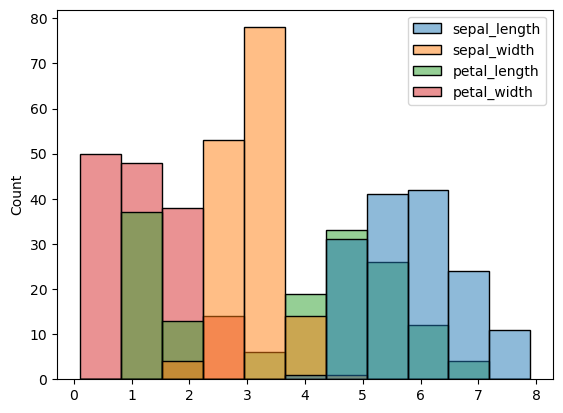

In [3]:
# histplot: ヒストグラムの描画
# - data=df でデータを指定
# 注意
# - 本来 plt.show() しないとグラフは描画されない
# - JupyterLab の場合はセルを抜ける時に自動的に描画
sns.histplot(data=df)

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

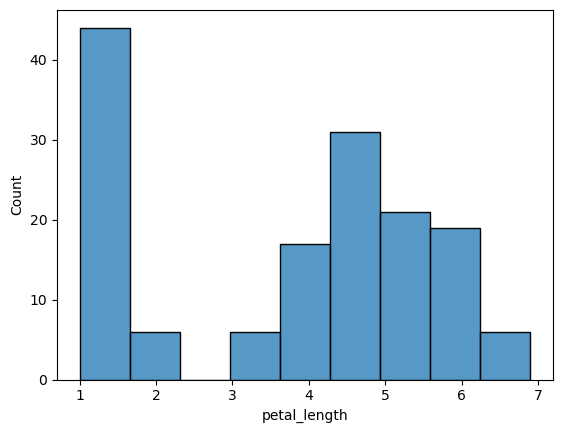

In [4]:
# petal_length のヒストグラム
# - x=df.petal_length でデータを指定
sns.histplot(x=df.petal_length)

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

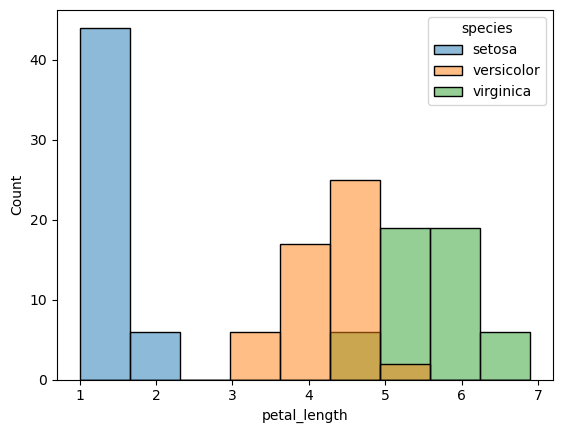

In [5]:
# petal_length のヒストグラム
# - hue=df.species をオプションで指定することで、species ごとに色分けされる
#   hue を指定する時には、x にデータを指定する必要がある
sns.histplot(x=df.petal_length, hue=df.species)

In [6]:
import math
# 階級数を求める sturges の公式
# - データの数 n に対し log2(n) + 1 以上の最小整数
def sturges(n):
    return math.ceil(math.log2(n) + 1)

for n in [len(df), len(df.query('species=="setosa"'))]:
    print(n, sturges(n))

150 9
50 7


<AxesSubplot:xlabel='petal_length', ylabel='Count'>

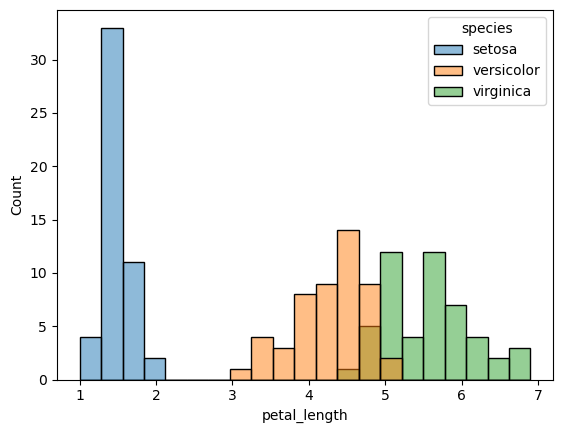

In [7]:
# 正確ではないが、各 species の階級数を sturges の公式の値に近づけるために
# 3倍した値を階級数 (bins) に指定
sns.histplot(x=df.petal_length, hue=df.species, bins=(sturges(len(df.query('species=="setosa"'))) * 3))

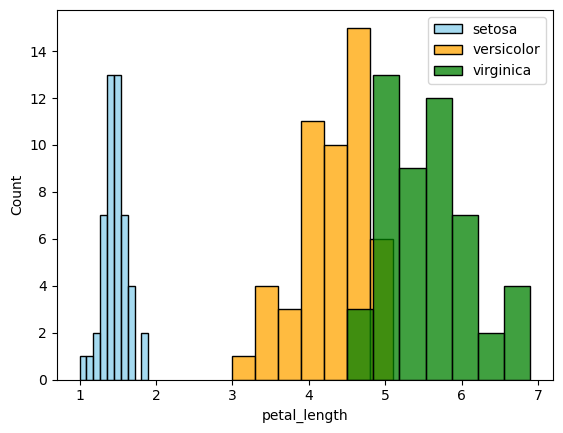

In [8]:
# species ごとにヒストグラムを描画して重ねる
# - color: https://matplotlib.org/examples/color/named_colors.html
# query('species=="setosa"') により species=="setosa" となる行だけを取り出す
sns.histplot(df.query('species=="setosa"').petal_length, label='setosa', color='skyblue')
sns.histplot(df.query('species=="versicolor"').petal_length, label='versicolor', color='orange')
sns.histplot(df.query('species=="virginica"').petal_length, label='virginica', color='green')
# 凡例の表示
plt.legend()

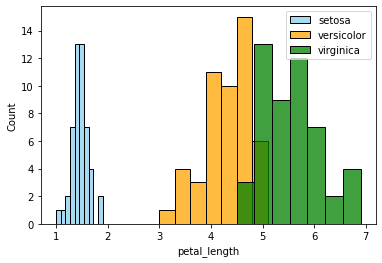

In [10]:
# query とは別の書き方
sns.histplot(df[df['species']=='setosa'].petal_length, label='setosa', color='skyblue')
sns.histplot(df[df['species']=='versicolor'].petal_length, label='versicolor', color='orange')
sns.histplot(df[df['species']=='virginica'].petal_length, label='virginica', color='green')
plt.legend()